## Define Data: write ................
##  Exploratory Data Analysis:
##  Importance Of EDA:
## Describe in short about PIIMA dataset that you are going to use.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'Diabetic']
# load dataset and attach corresponding label to each column of the raw data
dbts_ds= pd.read_csv('C:/Users/Administrator/thames dm_python/aisna/Lab/folder lab/pima_diabetes.csv', header=0, names=col_names)
dbts_ds.head()  # display first 40 rows of a dataset

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,Diabetic
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


# check dimensions i.e. number of rows and columns in ths dataset

In [ ]:
dbts_ds.shape

(769, 9)

## Determine how many rows are related to diabetic (1) class and non diabetic (0) in the total 768 rows of data

In [ ]:
dbts_ds.groupby('Diabetic').size()

Diabetic
0           500
1           268
Diabetic      1
dtype: int64

## View statistical details about the data

In [ ]:
dbts_ds.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,Diabetic
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.386719,29.153420,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096642,8.790942,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.153420,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
dbts_ds.describe().T  # transpose this table and see more easily

,count,mean,std,min,25%,50%,75%,max
pregnant,768.0,3.845052,3.369578,0.000,1.00000,3.00000,6.00000,17.00
glucose,768.0,121.686763,30.435949,44.000,99.75000,117.00000,140.25000,199.00
bp,768.0,72.386719,12.096642,24.000,64.00000,72.00000,80.00000,122.00
skin,768.0,29.153420,8.790942,7.000,25.00000,29.15342,32.00000,99.00
insulin,768.0,140.671875,86.383060,14.000,121.50000,125.00000,127.25000,846.00
bmi,768.0,32.455208,6.875177,18.200,27.50000,32.30000,36.60000,67.10
pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.37250,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.00000,41.00000,81.00
Diabetic,768.0,0.348958,0.476951,0.000,0.00000,0.00000,1.00000,1.00


## Exploratory Data Analysis (EDA)  - A preliminary examination of the dataset to better understand its patterns and properties through visualization.

Histogram - here we look at the distribution of each attribute by discretizing the continuous values into buckets and  count the frequency  in each bucket as histograms.

> Histogram is formed by couting the frequency of each  values in the attribute and then plotting it as bargraph.

#### This lets us note interesting properties of the attribute distributions such as the possible normal distribution of attributes  associated with the features of the dataset or skewness of the data feature.

array([[<Axes: title={'center': 'pregnant'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'bp'}>],
       [<Axes: title={'center': 'skin'}>,
        <Axes: title={'center': 'insulin'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'pedigree'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'Diabetic'}>]], dtype=object)

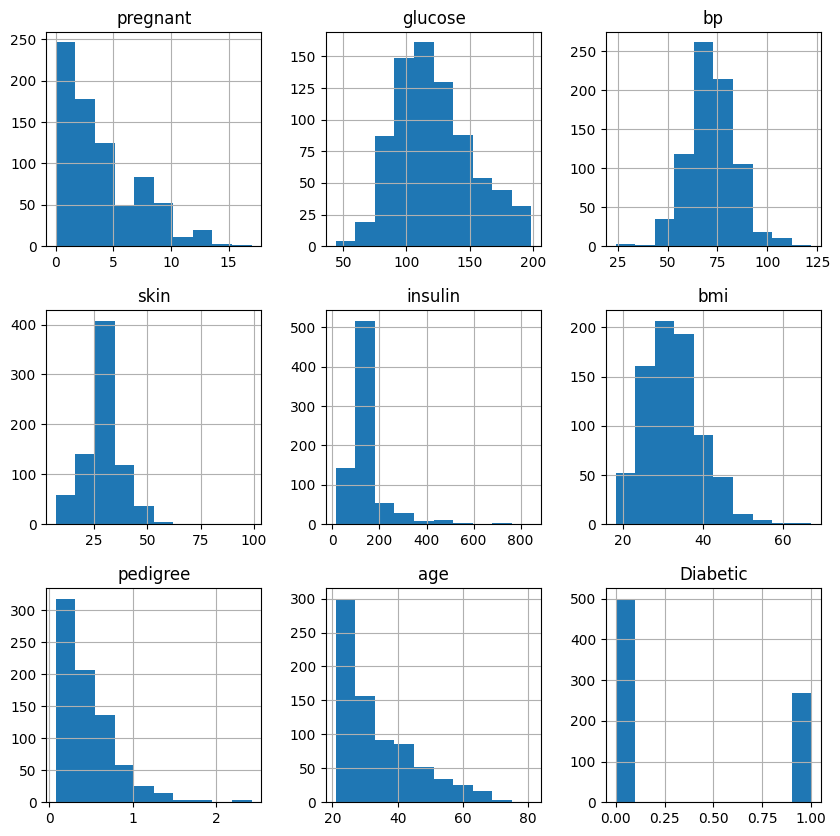

In [ ]:
dbts_ds.hist(figsize = (10,10))

## Histogram Data Interpretation of each attributes above

### Each picture above is a histogram  that shows the distribution of  each feature or attibute. Each figure represents a univariate distribution. i.e. involving only one variable or feature.

### <font color = green> Certain insights from the histogram plot </font>
1. we have idnetifed whether a data is normally distributed or skewed   
    1. i.e. "glucose" as normally distributed while "insulin" as right skewed)
2. Once we indeitfy the type of ditribution we can apply specific approach for missing values based on data distribution
    2. i.e. we may replace the missing value of  "glucose" as mean and missing value of  "insulin" as median.
3. Most of the learning models are based on Normal/Gaussian distribution (the bell shaped curve). So if any data feature is skewed we can transform it into normal distribution then impute the missing values and then feed the learning model.Because such models make good prediciton if data are distributed normally.
    3. Algorithms are biased when the data distritbuion is skewed i.e. if the learning algorithm(model) gets trained on the above insulin distribution then the model gives more accurate result on people with insulin level less than 250 but gives incorrect prediction  on people with insulin level grater then 350

### Check the skewness degree of each atribute.  Values near zero are less skewed as compared to values away from it. Distribtuions that have skewness value less than -1 or greater than +1 are skewed.

In [ ]:
print("Also check this skew value of each attribute in the histogram and you can make a lot of sense by simply seeing the skewnesss of each attibute ")

skew_attrib_val = dbts_ds.skew()
print(skew_attrib_val)

Also check this skew value of each attribute in the histogram and you can make a lot of sense by simply seeing the skewnesss of each attibute 
pregnant    0.901674
glucose     0.532719
bp          0.141885
skin        0.822173
insulin     3.380019
bmi         0.599233
pedigree    1.919911
age         1.129597
Diabetic    0.635017
dtype: float64


### Data Interpretation of above result -->From above skew value, we found that glucose, pregnancy are normally distributed while features like bp, insulin, pedigree etc are skewed.

## Another Insight from histogram data -->The  imbalanced class in the classification problem

### Below figure shows there's lot more observations for one class than another and may need special handling in the data preparation

## To know such imblanace --> Either use a count function or  visulaize through a histogram   - below figure shows a lot more non-diabetic observations than diabetic which needs special handling.

Diabetic
0           500
1           268
Diabetic      1
dtype: int64


Diabetic
0           Axes(0.125,0.11;0.775x0.77)
1           Axes(0.125,0.11;0.775x0.77)
Diabetic    Axes(0.125,0.11;0.775x0.77)
Name: glucose, dtype: object

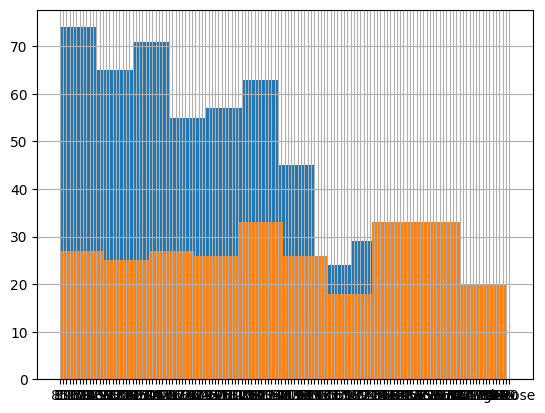

In [ ]:
output_grp = dbts_ds.groupby('Diabetic').size()
print(output_grp)

dbts_ds.groupby('Diabetic').glucose.hist(alpha=1)

The above figure shows that there are a lot more non diabetic patient than diabetes patients in the total 768 observations.
****
<b>Training model on such imbalanced classes will likely predict the majority class (non diabetic) and hence the model will have low accuracy predicting diabetic population. </b>

### Box Plots
****
<b> Visualize data distritbution's median as thick line within the box, interquartile range with 25th percentile as left most boundary and  75th percetnile as right most boundary. Data outisde of these interquartile range are considered outliers.</b>

###### From the diagram below Insulin has the highest outliers while glucose has the lowest

MODIFIED  PIMA_NEW DATASET


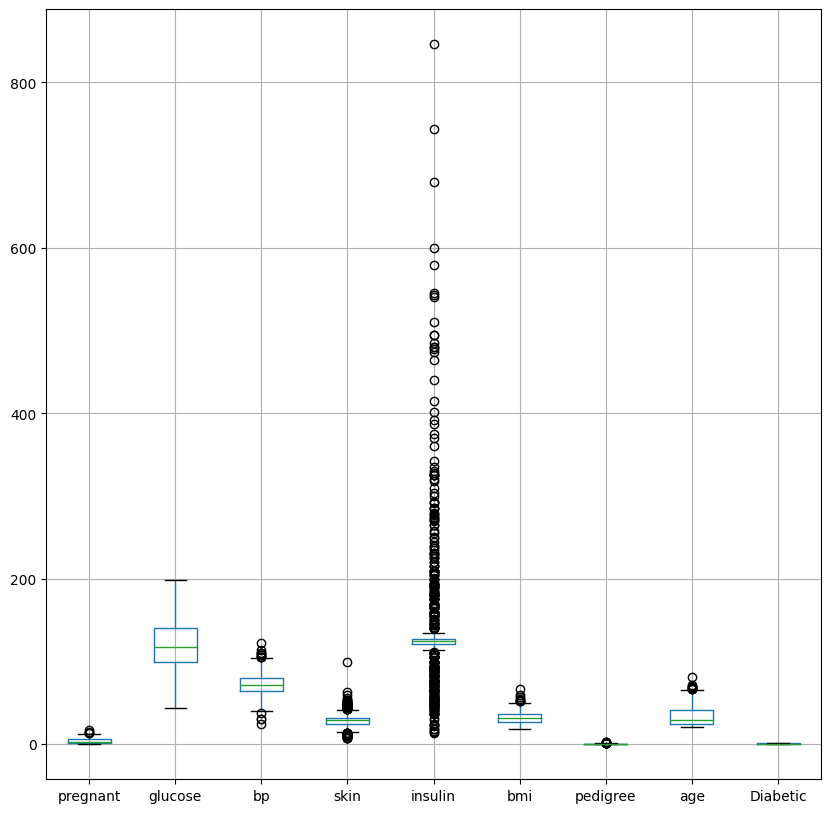

In [ ]:
dbts_ds.boxplot(figsize =(10,10))
print("MODIFIED  PIMA_NEW DATASET")

## Heatmap Plot
****
Identifying correlation between two attributes, values nearer to +1 represents stronger linear relationship between two variables while values nearer to  -1 represents  inverse relation.

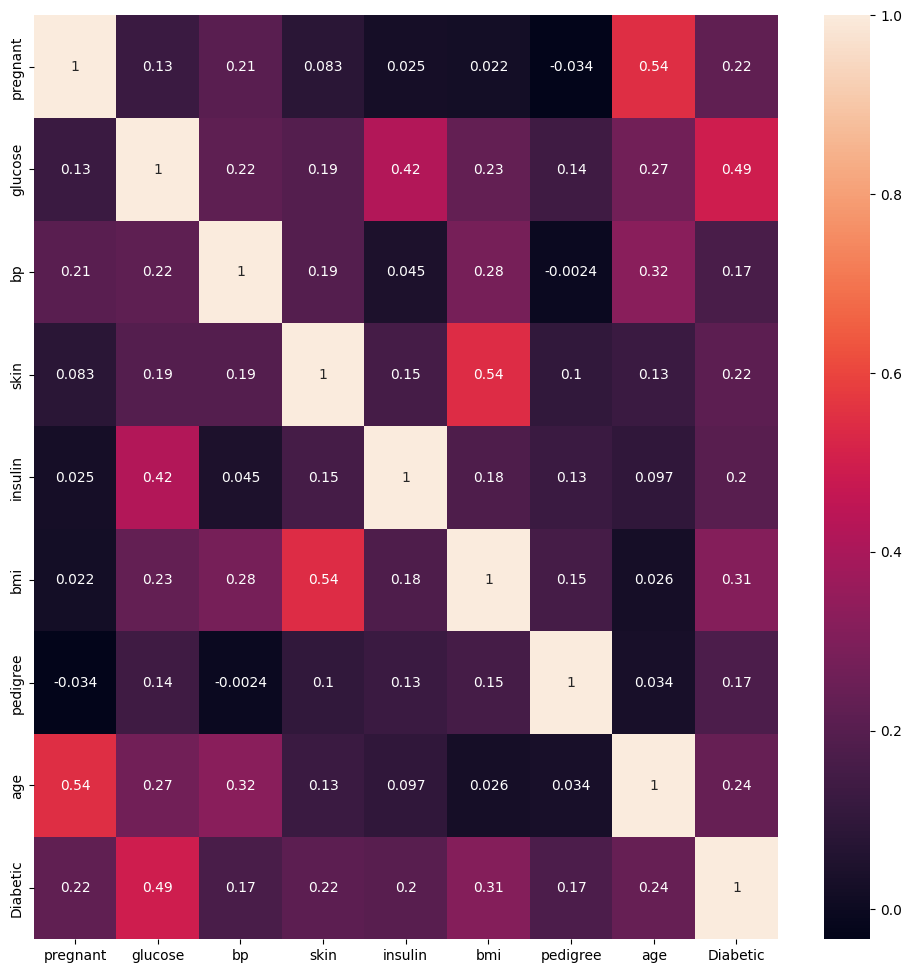

In [ ]:
plt.figure(figsize=(12,12))  # we set the size of figure to 12 by 12.
dbts_ds=sns.heatmap(dbts_ds.corr(), annot=True)  # use seaborn library heatmap